# Exploratory Code

In [15]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

RANDOM_SEED=42

# Dataset

In [16]:
df = pd.read_csv('./data/austin_car_crash_cleaned.csv')

In [17]:
display(df.head())

fatal_crash                primary_address secondary_address  speed_limit  \
0        False              2800 N LAMAR BLVD    SAN GABRIEL ST         35.0   
1        False              7500 NOT REPORTED   CONVICT HILL RD         65.0   
2        False         3400 W SLAUGHTER LN LN      SLAUGHTER LN         45.0   
3        False       800 CAPITOL OF TEXAS HWY  W LAS CIMAS PKWY         60.0   
4        False  14720 STAKED PLAINS LOOP LOOP    MISTY WHITE DR         30.0   

   construction_zone   latitude  longitude  sus_serious_injry_cnt  \
0              False  30.244344 -97.781309                      0   
1              False  30.216696 -97.848713                      0   
2              False  30.182598 -97.847707                      0   
3              False  30.290776 -97.828303                      0   
4              False  30.499680 -97.793717                      0   

   nonincap_injry_cnt  poss_injry_cnt  ...  hour  day_of_week  month  year  \
0                   0               4  ...    13            2      1  2014   
1                   0               0  ...    14            2      1  2014   
2                   0               1  ...     8            2      1  2014   
3                   0               0  ...    11            3      1  2014   
4                   0               1  ...     5            4      1  2014   

   day_of_month  weekend  hour_sin  hour_cos  month_sin  month_cos  
0             8        0 -0.258819 -0.965926        0.5   0.866025  
1             8        0 -0.500000 -0.866025        0.5   0.866025  
2            22        0  0.866025 -0.500000        0.5   0.866025  
3             2        0  0.258819 -0.965926        0.5   0.866025  
4            17        0  0.965926  0.258819        0.5   0.866025  

[5 rows x 53 columns]

In [18]:
print(df.shape)

(159231, 53)


In [19]:
print(df.columns)

Index(['fatal_crash', 'primary_address', 'secondary_address', 'speed_limit',
       'construction_zone', 'latitude', 'longitude', 'sus_serious_injry_cnt',
       'nonincap_injry_cnt', 'poss_injry_cnt', 'non_injry_cnt',
       'unkn_injry_cnt', 'tot_injry_cnt', 'death_cnt',
       'motor_vehicle_death_count', 'motor_vehicle_serious_injury_count',
       'bicycle_death_count', 'bicycle_serious_injury_count',
       'pedestrian_death_count', 'pedestrian_serious_injury_count',
       'motorcycle_death_count', 'motorcycle_serious_injury_count',
       'other_death_count', 'other_serious_injury_count',
       'micromobility_serious_injury_count', 'micromobility_death_count',
       'timestamp_us_central', 'law_enforcement_fatality_count',
       'estimated_maximum_comprehensive_cost',
       'estimated_total_comprehensive_cost', 'severity_incapacitating_injury',
       'severity_killed', 'severity_non_incapacitating_injury',
       'severity_not_injured', 'severity_possible_injury', 'severit

# Missing data

In [20]:
display(df.isnull().sum())

fatal_crash                              0
primary_address                          0
secondary_address                        0
speed_limit                              0
construction_zone                        0
latitude                                 0
longitude                                0
sus_serious_injry_cnt                    0
nonincap_injry_cnt                       0
poss_injry_cnt                           0
non_injry_cnt                            0
unkn_injry_cnt                           0
tot_injry_cnt                            0
death_cnt                                0
motor_vehicle_death_count                0
motor_vehicle_serious_injury_count       0
bicycle_death_count                      0
bicycle_serious_injury_count             0
pedestrian_death_count                   0
pedestrian_serious_injury_count          0
motorcycle_death_count                   0
motorcycle_serious_injury_count          0
other_death_count                        0
other_serio

# General

In [21]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159231 entries, 0 to 159230
Data columns (total 53 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   fatal_crash                            159231 non-null  bool   
 1   primary_address                        159231 non-null  object 
 2   secondary_address                      159231 non-null  object 
 3   speed_limit                            159231 non-null  float64
 4   construction_zone                      159231 non-null  bool   
 5   latitude                               159231 non-null  float64
 6   longitude                              159231 non-null  float64
 7   sus_serious_injry_cnt                  159231 non-null  int64  
 8   nonincap_injry_cnt                     159231 non-null  int64  
 9   poss_injry_cnt                         159231 non-null  int64  
 10  non_injry_cnt                          159231 non-null  

None

In [22]:
print(f'maximum_comprehensive_cost Mean: {df['estimated_maximum_comprehensive_cost'].mean()}')
print(f'maximum_comprehensive_cost Median: {df['estimated_maximum_comprehensive_cost'].median()}')
print(f'maximum_comprehensive_cost Std: {df['estimated_maximum_comprehensive_cost'].std()}')

maximum_comprehensive_cost Mean: 214766.72256030547
maximum_comprehensive_cost Median: 20000.0
maximum_comprehensive_cost Std: 558796.7909780979


In [23]:
print(f'total_comprehensive_cost Mean: {df['estimated_total_comprehensive_cost'].mean()}')
print(f'total_comprehensive_cost Median: {df['estimated_total_comprehensive_cost'].median()}')
print(f'total_comprehensive_cost Std: {df['estimated_total_comprehensive_cost'].std()}')

total_comprehensive_cost Mean: 307980.9836024392
total_comprehensive_cost Median: 80000.0
total_comprehensive_cost Std: 742542.9733279421


# Distribution

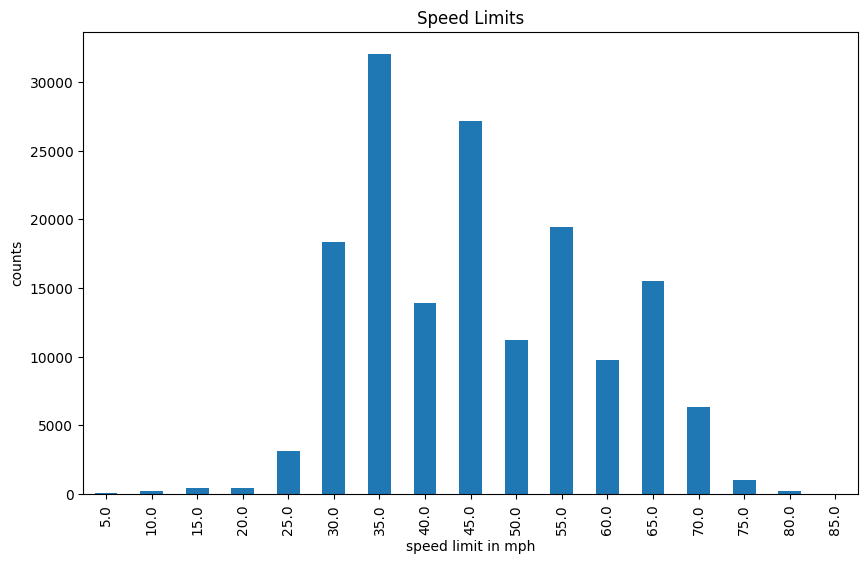

In [24]:
plt.figure(figsize=(10, 6))
df['speed_limit'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.title('Speed Limits')
plt.xlabel('speed limit in mph')
plt.ylabel('counts')
plt.show()

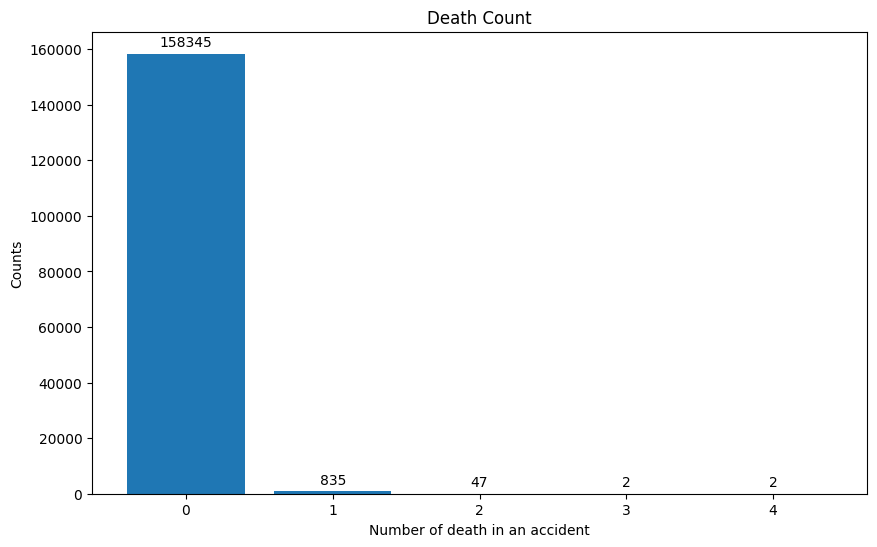

In [25]:
plt.figure(figsize=(10, 6))
counts = df['death_cnt'].value_counts().sort_index(ascending=True)
bars = plt.bar(counts.index, counts)
plt.bar_label(bars, padding=3)
plt.title('Death Count')
plt.xlabel('Number of death in an accident')
plt.ylabel('Counts')
plt.show()

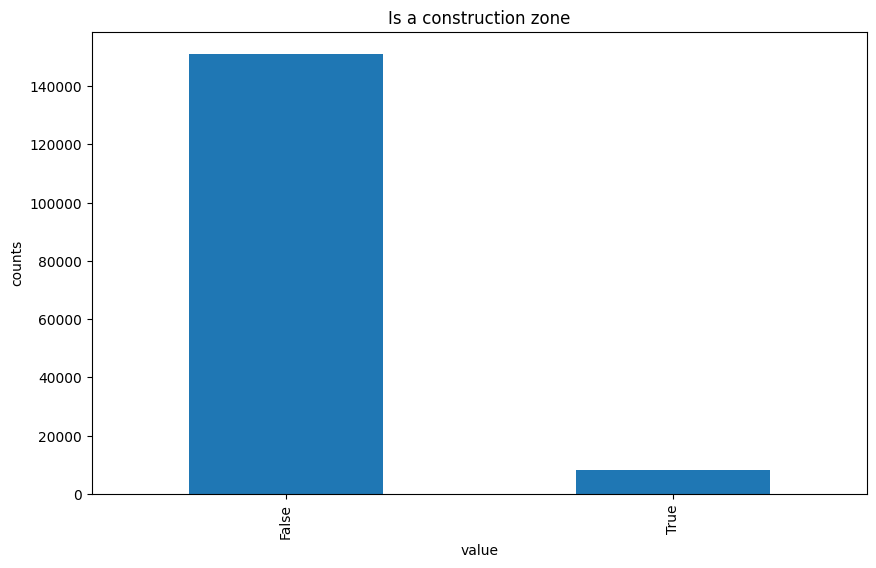

In [26]:
plt.figure(figsize=(10, 6))
df['construction_zone'].value_counts().plot(kind='bar')
plt.title('Is a construction zone')
plt.xlabel('value')
plt.ylabel('counts')
plt.show()

In [27]:
from folium.plugins import HeatMap

lat_avg = df['latitude'].mean()
lon_avg = df['longitude'].mean()

accidents_heat_map = df[['latitude','longitude','death_cnt']]

lat_avg = accidents_heat_map['latitude'].mean()
lon_avg = accidents_heat_map['longitude'].mean()

map = folium.Map([lat_avg, lon_avg], zoom_start=10)
HeatMap(accidents_heat_map).add_to(map)
map

# Outliers

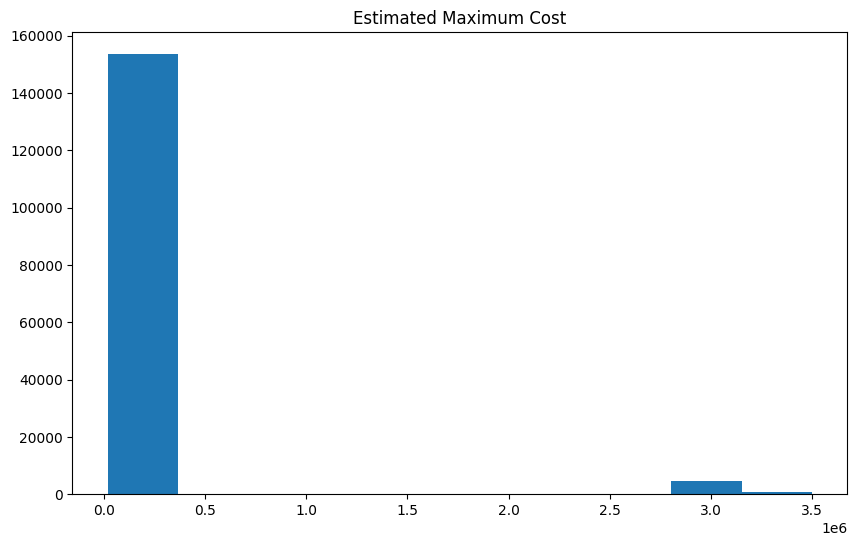

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(df['estimated_maximum_comprehensive_cost'])
plt.title('Estimated Maximum Cost')
plt.show()

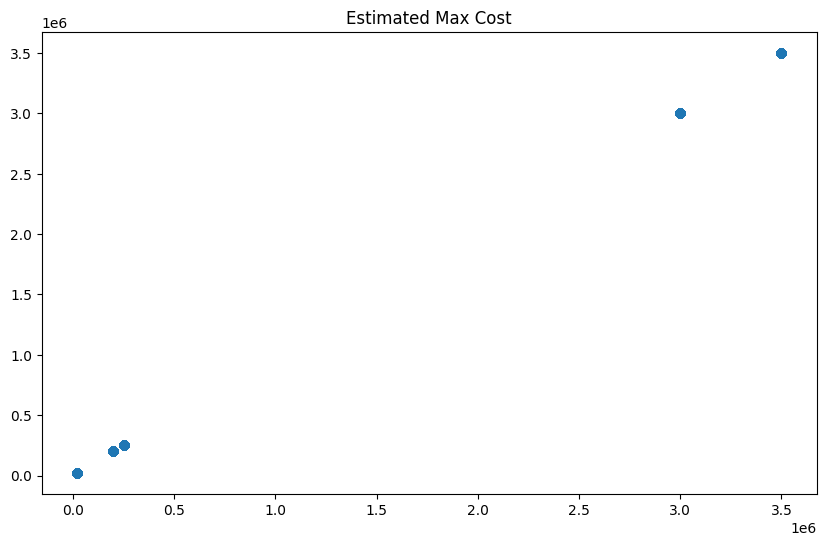

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(df['estimated_maximum_comprehensive_cost'], df['estimated_maximum_comprehensive_cost'])
plt.title('Estimated Max Cost')
plt.show()

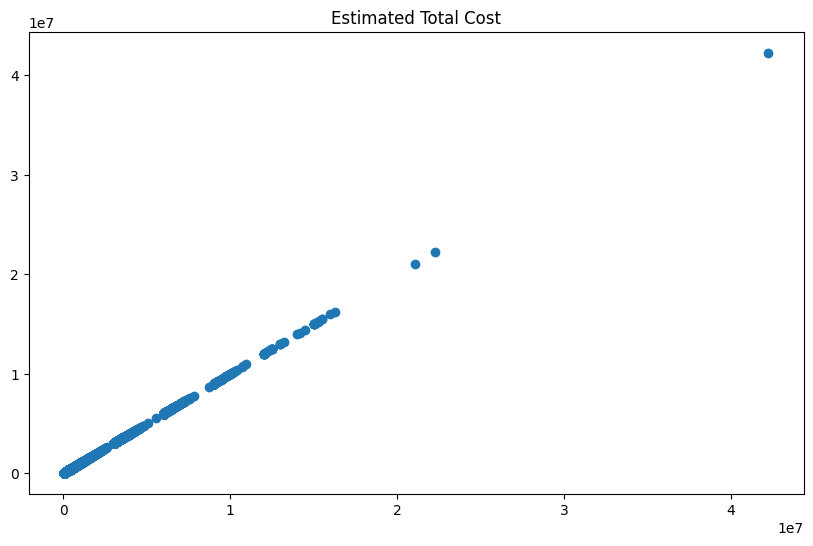

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(df['estimated_total_comprehensive_cost'], df['estimated_total_comprehensive_cost'])
plt.title('Estimated Total Cost')
plt.show()

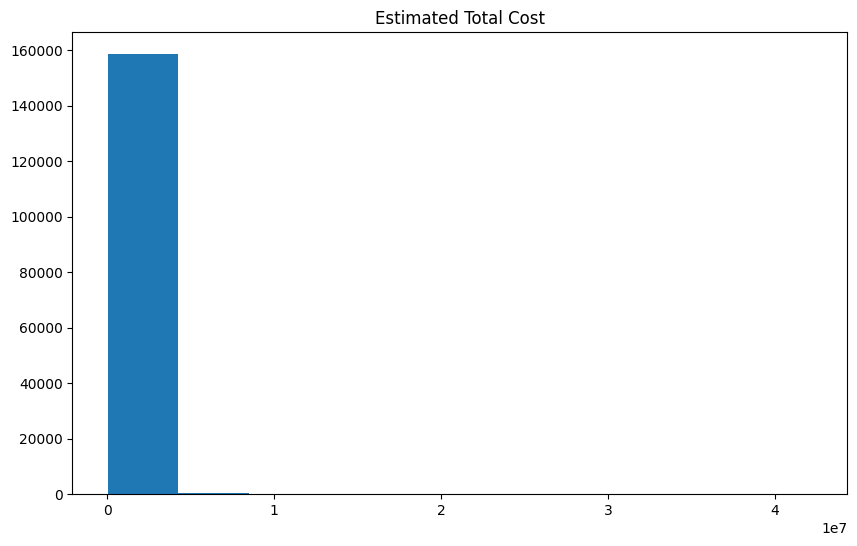

In [31]:
plt.figure(figsize=(10, 6))
plt.hist(df['estimated_total_comprehensive_cost'])
plt.title('Estimated Total Cost')
plt.show()

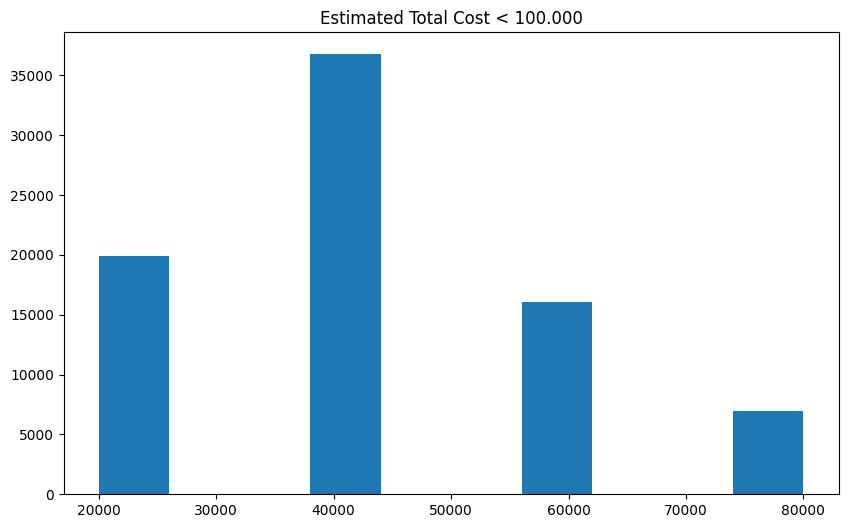

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['estimated_total_comprehensive_cost'] < 100000]['estimated_total_comprehensive_cost'])
plt.title('Estimated Total Cost < 100.000')
plt.show()

In [33]:
print(df['timestamp_us_central'].max())
print(df['timestamp_us_central'].min())

2025-03-07 02:07:00
2010-01-01 01:12:00


In [34]:
df['timestamp_us_central'] = pd.to_datetime(df['timestamp_us_central'])
df['year_month'] = df['timestamp_us_central'].dt.to_period('M')

average_cost_by_month = df.groupby('year_month')['estimated_total_comprehensive_cost'].mean()

In [35]:
print(average_cost_by_month)

year_month
2010-01    279826.771654
2010-02    283103.448276
2010-03    318194.607268
2010-04    341643.678161
2010-05    307050.000000
               ...      
2024-11    312405.764967
2024-12    334097.744361
2025-01    235551.330798
2025-02    273177.691310
2025-03    328666.666667
Freq: M, Name: estimated_total_comprehensive_cost, Length: 183, dtype: float64


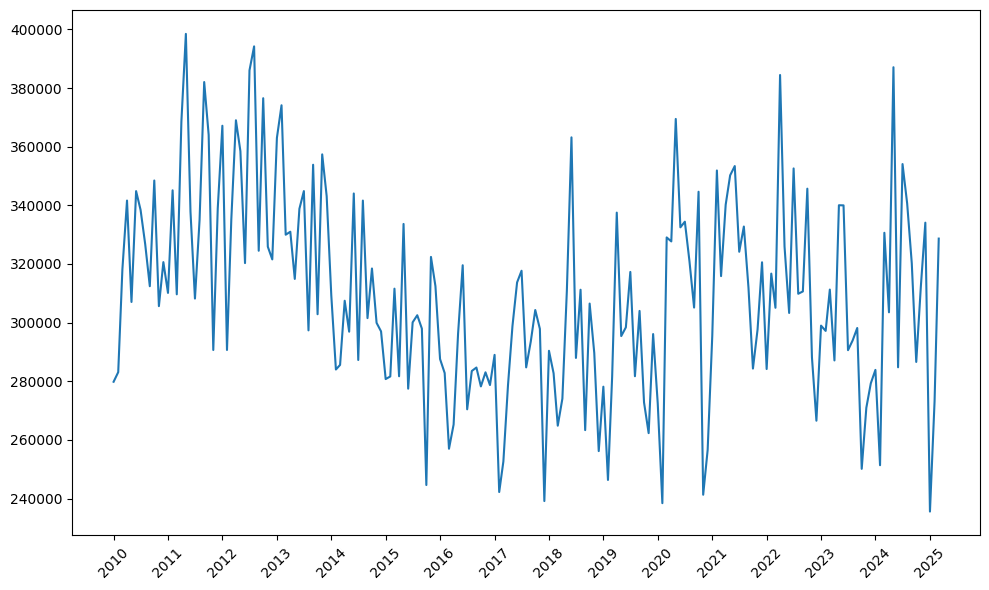

In [36]:
import matplotlib.dates as mdates

plt.figure(figsize=(10, 6))
plt.plot(average_cost_by_month.index.to_timestamp(), average_cost_by_month.values)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()